# Final Data Analysis(Titanic Data)

### 3조 (유병화, 김은지, 이신영, 명재성)

## 0. Importing packages(EDA 및 Modeling에 필요한 Function 불러오기)

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split    
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os

C:\python\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 1. Importing Data and finding some structures 

In [2]:
os.chdir('C:\\Users\\김은지\\Desktop')
train = pd.read_csv('titanic.csv') ## Training Data

In [4]:
os.chdir('C:\\Users\\김은지\\Desktop')
senior_d= pd.read_csv('senior_d.csv') ## Training Data

In [6]:
senior_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204425 entries, 0 to 204424
Data columns (total 19 columns):
date               204425 non-null object
time               204425 non-null int64
sex                204425 non-null int64
year               204425 non-null int64
month              204425 non-null int64
d_date             204425 non-null int64
age                204425 non-null int64
job                204425 non-null int64
marriage           204425 non-null int64
edu                204425 non-null int64
temp               204425 non-null float64
lowest_temp        204425 non-null float64
highest_temp       204425 non-null float64
humidity           204425 non-null float64
total_sun          204425 non-null float64
cloud              204425 non-null float64
air_pressure       204425 non-null float64
daily_temp_diff    204425 non-null float64
suicide            204425 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 29.6+ MB


In [7]:
senior_d.columns.values

array(['date', 'time', 'sex', 'year', 'month', 'd_date', 'age', 'job',
       'marriage', 'edu', 'temp', 'lowest_temp', 'highest_temp',
       'humidity', 'total_sun', 'cloud', 'air_pressure',
       'daily_temp_diff', 'suicide'], dtype=object)

In [8]:
senior_d = senior_d.drop(['date','year','d_date','cloud'], axis = 1)
senior_d.head(10)


,time,sex,month,age,job,marriage,edu,temp,lowest_temp,highest_temp,humidity,total_sun,air_pressure,daily_temp_diff,suicide
0,8,1,1,73,5,2,4,4.0,0.3,7.9,51.3,6.4,1003.6,7.6,1
1,12,1,1,79,13,2,4,4.0,0.3,7.9,51.3,6.4,1003.6,7.6,1
2,15,1,1,69,5,2,2,4.0,0.3,7.9,51.3,6.4,1003.6,7.6,1
3,17,1,1,85,13,4,2,4.0,0.3,7.9,51.3,6.4,1003.6,7.6,1
4,11,2,1,76,13,4,1,4.0,0.3,7.9,51.3,6.4,1003.6,7.6,1
5,3,2,1,86,13,4,2,4.0,0.3,7.9,51.3,6.4,1003.6,7.6,0
6,4,2,1,71,13,2,2,4.0,0.3,7.9,51.3,6.4,1003.6,7.6,0
7,4,2,1,84,13,4,4,4.0,0.3,7.9,51.3,6.4,1003.6,7.6,0
8,4,2,1,94,13,2,1,4.0,0.3,7.9,51.3,6.4,1003.6,7.6,0
9,5,2,1,81,13,4,1,4.0,0.3,7.9,51.3,6.4,1003.6,7.6,0


In [12]:
senior_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204425 entries, 0 to 204424
Data columns (total 15 columns):
time               204425 non-null int64
sex                204425 non-null int64
month              204425 non-null int64
age                204425 non-null int64
job                204425 non-null int64
marriage           204425 non-null int64
edu                204425 non-null int64
temp               204425 non-null float64
lowest_temp        204425 non-null float64
highest_temp       204425 non-null float64
humidity           204425 non-null float64
total_sun          204425 non-null float64
air_pressure       204425 non-null float64
daily_temp_diff    204425 non-null float64
suicide            204425 non-null int64
dtypes: float64(7), int64(8)
memory usage: 23.4 MB


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["job", "marriage", "edu"])),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [20]:
senior_d.head()

,time,sex,month,age,job,marriage,edu,temp,lowest_temp,highest_temp,humidity,total_sun,air_pressure,daily_temp_diff,suicide
0,8,1,1,73,3,2,4,4.0,0.3,7.9,51.3,6.4,1003.6,7.6,1
1,12,1,1,79,8,2,4,4.0,0.3,7.9,51.3,6.4,1003.6,7.6,1
2,15,1,1,69,3,2,2,4.0,0.3,7.9,51.3,6.4,1003.6,7.6,1
3,17,1,1,85,8,4,2,4.0,0.3,7.9,51.3,6.4,1003.6,7.6,1
4,11,2,1,76,8,4,1,4.0,0.3,7.9,51.3,6.4,1003.6,7.6,1


In [36]:
senior_d=senior_d[~senior_d['age'].isin(['999'])]
senior_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204386 entries, 0 to 204424
Data columns (total 15 columns):
time               204386 non-null int64
sex                204386 non-null int64
month              204386 non-null int64
age                204386 non-null int64
job                204386 non-null int64
marriage           204386 non-null int64
edu                204386 non-null int64
temp               204386 non-null float64
lowest_temp        204386 non-null float64
highest_temp       204386 non-null float64
humidity           204386 non-null float64
total_sun          204386 non-null float64
air_pressure       204386 non-null float64
daily_temp_diff    204386 non-null float64
suicide            204386 non-null int64
dtypes: float64(7), int64(8)
memory usage: 24.9 MB


In [37]:
senior_d=senior_d[~senior_d['marriage'].isin(['9'])]
senior_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204130 entries, 0 to 204424
Data columns (total 15 columns):
time               204130 non-null int64
sex                204130 non-null int64
month              204130 non-null int64
age                204130 non-null int64
job                204130 non-null int64
marriage           204130 non-null int64
edu                204130 non-null int64
temp               204130 non-null float64
lowest_temp        204130 non-null float64
highest_temp       204130 non-null float64
humidity           204130 non-null float64
total_sun          204130 non-null float64
air_pressure       204130 non-null float64
daily_temp_diff    204130 non-null float64
suicide            204130 non-null int64
dtypes: float64(7), int64(8)
memory usage: 24.9 MB


In [39]:
senior_d['edu'].value_counts()

2    69499
1    45152
4    34360
3    26931
6    18673
9     6192
7     3323
Name: edu, dtype: int64

In [40]:
senior_d=senior_d[~senior_d['edu'].isin(['9'])]
senior_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197938 entries, 0 to 204424
Data columns (total 15 columns):
time               197938 non-null int64
sex                197938 non-null int64
month              197938 non-null int64
age                197938 non-null int64
job                197938 non-null int64
marriage           197938 non-null int64
edu                197938 non-null int64
temp               197938 non-null float64
lowest_temp        197938 non-null float64
highest_temp       197938 non-null float64
humidity           197938 non-null float64
total_sun          197938 non-null float64
air_pressure       197938 non-null float64
daily_temp_diff    197938 non-null float64
suicide            197938 non-null int64
dtypes: float64(7), int64(8)
memory usage: 24.2 MB


In [42]:
senior_d['job'].value_counts().sort_index()

0      2448
1      2675
2      1420
3      3617
4      7033
5       822
6       394
7      3419
8    173725
9      2385
Name: job, dtype: int64

In [43]:
senior_d=senior_d[~senior_d['job'].isin(['9'])]
senior_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195553 entries, 0 to 204424
Data columns (total 15 columns):
time               195553 non-null int64
sex                195553 non-null int64
month              195553 non-null int64
age                195553 non-null int64
job                195553 non-null int64
marriage           195553 non-null int64
edu                195553 non-null int64
temp               195553 non-null float64
lowest_temp        195553 non-null float64
highest_temp       195553 non-null float64
humidity           195553 non-null float64
total_sun          195553 non-null float64
air_pressure       195553 non-null float64
daily_temp_diff    195553 non-null float64
suicide            195553 non-null int64
dtypes: float64(7), int64(8)
memory usage: 23.9 MB


In [44]:
data=pd.concat([senior_d, pd.get_dummies(senior_d['edu'], prefix="edu")], axis=1)
data = data.drop("edu", axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195553 entries, 0 to 204424
Data columns (total 20 columns):
time               195553 non-null int64
sex                195553 non-null int64
month              195553 non-null int64
age                195553 non-null int64
job                195553 non-null int64
marriage           195553 non-null int64
temp               195553 non-null float64
lowest_temp        195553 non-null float64
highest_temp       195553 non-null float64
humidity           195553 non-null float64
total_sun          195553 non-null float64
air_pressure       195553 non-null float64
daily_temp_diff    195553 non-null float64
suicide            195553 non-null int64
edu_1              195553 non-null uint8
edu_2              195553 non-null uint8
edu_3              195553 non-null uint8
edu_4              195553 non-null uint8
edu_6              195553 non-null uint8
edu_7              195553 non-null uint8
dtypes: float64(7), int64(7), uint8(6)
memory usage: 23

In [45]:
data=pd.concat([data, pd.get_dummies(senior_d['sex'], prefix="sex")], axis=1)
data = data.drop("sex", axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195553 entries, 0 to 204424
Data columns (total 21 columns):
time               195553 non-null int64
month              195553 non-null int64
age                195553 non-null int64
job                195553 non-null int64
marriage           195553 non-null int64
temp               195553 non-null float64
lowest_temp        195553 non-null float64
highest_temp       195553 non-null float64
humidity           195553 non-null float64
total_sun          195553 non-null float64
air_pressure       195553 non-null float64
daily_temp_diff    195553 non-null float64
suicide            195553 non-null int64
edu_1              195553 non-null uint8
edu_2              195553 non-null uint8
edu_3              195553 non-null uint8
edu_4              195553 non-null uint8
edu_6              195553 non-null uint8
edu_7              195553 non-null uint8
sex_1              195553 non-null uint8
sex_2              195553 non-null uint8
dtypes: float6

In [46]:
data=pd.concat([data, pd.get_dummies(senior_d['job'], prefix="job")], axis=1)
data= data.drop("job", axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195553 entries, 0 to 204424
Data columns (total 29 columns):
time               195553 non-null int64
month              195553 non-null int64
age                195553 non-null int64
marriage           195553 non-null int64
temp               195553 non-null float64
lowest_temp        195553 non-null float64
highest_temp       195553 non-null float64
humidity           195553 non-null float64
total_sun          195553 non-null float64
air_pressure       195553 non-null float64
daily_temp_diff    195553 non-null float64
suicide            195553 non-null int64
edu_1              195553 non-null uint8
edu_2              195553 non-null uint8
edu_3              195553 non-null uint8
edu_4              195553 non-null uint8
edu_6              195553 non-null uint8
edu_7              195553 non-null uint8
sex_1              195553 non-null uint8
sex_2              195553 non-null uint8
job_0              195553 non-null uint8
job_1         

In [47]:
data=pd.concat([data, pd.get_dummies(senior_d['marriage'], prefix="marriage")], axis=1)
data= data.drop("marriage", axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195553 entries, 0 to 204424
Data columns (total 32 columns):
time               195553 non-null int64
month              195553 non-null int64
age                195553 non-null int64
temp               195553 non-null float64
lowest_temp        195553 non-null float64
highest_temp       195553 non-null float64
humidity           195553 non-null float64
total_sun          195553 non-null float64
air_pressure       195553 non-null float64
daily_temp_diff    195553 non-null float64
suicide            195553 non-null int64
edu_1              195553 non-null uint8
edu_2              195553 non-null uint8
edu_3              195553 non-null uint8
edu_4              195553 non-null uint8
edu_6              195553 non-null uint8
edu_7              195553 non-null uint8
sex_1              195553 non-null uint8
sex_2              195553 non-null uint8
job_0              195553 non-null uint8
job_1              195553 non-null uint8
job_2         

In [48]:
data.to_csv("senior_d_preprocessed.csv")

In [51]:
import random

In [89]:
data['suicide'].value_counts()

0    191664
1      3889
Name: suicide, dtype: int64

In [113]:
sample_data1=data[data['suicide']==1]

In [114]:
sample_data2=data[data['suicide']==0]

In [115]:
sample_data2=sample_data2.sample(n=3889,random_state=42)

In [116]:
sample_data=sample_data1.append(sample_data2)
sample_data.to_csv("senior_d_preprocessed_60by50.csv")

In [126]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [129]:
scaling_data=preprocessing.MinMaxScaler(feature_range=(0,1))

In [ ]:
scaled_data=scaling_data.fit_transform(sample_data['',''])

In [117]:
train_set,test_set=train_test_split(sample_data,test_size=0.25,random_state=42)

In [123]:
x_train = sample_dat.drop(['suicide'], axis=1).values  
y_train = sample_data['suicide'].values

ValueError: labels ['job'] not contained in axis

In [107]:
models = []
models.append(('LR', LogisticRegression())) # Logistic Regression Method
models.append(("KNN", KNeighborsClassifier(5)))       # K = 5인 K-means clustering(KNN)
models.append(("Decision Tree", DecisionTreeClassifier(max_depth=5)))      # DC의 maximal depth는 5에 해당함(Decision Tree Method)
models.append(("Random Forest", RandomForestClassifier(max_depth=5, n_estimators=500))) # Random Forest Method
models.append(("Neural Net", MLPClassifier(hidden_layer_sizes=25, activation='logistic', max_iter=1000))) # Neural Network Method
     # Hidden layer 25개, activation function으로는 hyperbolic tangent를 이용하며, backpropagation할 때 반복 수는 1000번에 해당함
models.append(("AdaBoost", AdaBoostClassifier(n_estimators = 10))) ## Boosting Method


results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state = 33333, shuffle = True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring = 'accuracy') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)

LR: 0.638782
KNN: 0.617524
Decision Tree: 0.633301
Random Forest: 0.644781
Neural Net: 0.609993
AdaBoost: 0.639121


In [108]:
# Accuracy가 가장 높은 Random Forest 방법으로 test dataset에 대한 Prediction 수행

RF = RandomForestClassifier(max_depth = 5, n_estimators = 500)
RF.fit(x_train, y_train)
predictions = RF.predict(x_test)
print(round(accuracy_score(y_test, predictions),2))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions)) # 행 : 실제 Survived 여부 / 열 : 예측 Survived 여부

0.67
[[600 376]
 [275 694]]
             precision    recall  f1-score   support

          0       0.69      0.61      0.65       976
          1       0.65      0.72      0.68       969

avg / total       0.67      0.67      0.66      1945



In [54]:
sample_data['suicide'].value_counts()

0    4893
1     107
Name: suicide, dtype: int64

In [103]:
x_train=train_set.drop(['suicide'],axis=1).values

In [104]:
y_train=train_set['suicide'].values

In [105]:
x_test=test_set.drop(['suicide'],axis=1).values

In [106]:
y_test=test_set['suicide'].values

In [3]:
train.info() ## 변수 Name, type, 및 변수의 Value에 결측치가 있는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [28]:
from collections import Counter
d = Counter(senior_d['edu'])
d

Counter({1: 45205, 2: 69524, 3: 26936, 4: 34363, 6: 18677, 7: 3324, 9: 6396})

891

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
companion=pd.Series([])

In [6]:

for i in range(len(train)):
    companion[i]=train['Ticket'][train['Ticket']==train['Ticket'][i]].count()
    

In [7]:
companion=companion-1

In [8]:
train['Companion']=companion

In [9]:
train['Companion']=train['Companion'].astype(int)

In [10]:
len(train)

891

In [11]:
train.count() ## counting the number of values in each variable

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Companion      891
dtype: int64

In [12]:
## Titanic data의 missing value 분포 비율(NULL Ratio) 계산 
total = train.isnull().sum().sort_values(ascending=False) ## 결측치 수가 많은 순서대로 정렬(내림차순)
percent_1 = train.isnull().sum()/train.isnull().count()*100 ## NA ratio
percent_2 = (round(percent_1, 1)).sort_values(ascending=False) ## NA ratio 소수 둘째 자리에서 반올림
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%']) ## total, percent를 병합한 Missing value table
missing_data.head(5)


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Companion,0,0.0
Fare,0,0.0


In [13]:
train.columns.values ## R로 치면 names(titanic)

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Companion'],
      dtype=object)

In [14]:
train.describe() ## 요약통계량 제시

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Companion
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.787879
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.361142
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.000000


In [15]:
## Mutate Variable -> SibSp(동반한 형제자매 + 배우자 수) + Parch(동반한 부모 + 자녀 수)로 Family(총 가족 수)라는 파생변수 생성
train['Family'] = train['SibSp']+(train['Parch']) 
train['Family'] = train['Family'].astype(int)

In [17]:
## Drop Variables
train = train.drop(['PassengerId','SibSp','Parch','Fare','Cabin','Name','Ticket'], axis = 1)
train.head(10)

# SibSp + Parch로 가족수를 나타내는 변수인 'family'를 생성하였으므로 두 변수는 제거
# Fare(승선 요금) : Embarked(출발지)와 Pclass(객실등급)으로 설명이 되는 변수로 판단하여 제거
# Cabin(객실 번호) : NA 비율이 77%에 달하여 imputation에 있어서도 한계가 드러난다 판단하여 제거
# Ticket과 Name 역시 특별한 의미가 없다고 판단하여 제거

,Survived,Pclass,Sex,Age,Embarked,Companion,Family
0,0,3,male,22.0,S,0,1
1,1,1,female,38.0,C,0,1
2,1,3,female,26.0,S,0,0
3,1,1,female,35.0,S,1,1
4,0,3,male,35.0,S,0,0
5,0,3,male,NaN,Q,0,0
6,0,1,male,54.0,S,0,0
7,0,3,male,2.0,S,3,4
8,1,3,female,27.0,S,2,2
9,1,2,female,14.0,C,1,1


In [18]:
train.head(10)

,Survived,Pclass,Sex,Age,Embarked,Companion,Family
0,0,3,male,22.0,S,0,1
1,1,1,female,38.0,C,0,1
2,1,3,female,26.0,S,0,0
3,1,1,female,35.0,S,1,1
4,0,3,male,35.0,S,0,0
5,0,3,male,NaN,Q,0,0
6,0,1,male,54.0,S,0,0
7,0,3,male,2.0,S,3,4
8,1,3,female,27.0,S,2,2
9,1,2,female,14.0,C,1,1


In [19]:
# Embarked 변수
from collections import Counter
d = Counter(train['Embarked'])
d

Counter({'C': 168, 'Q': 77, 'S': 644, nan: 2})

## 2. Data Visualization for searching some relationship

### (1) Age & Sex vs Survived

Text(0.5,1,'Male')

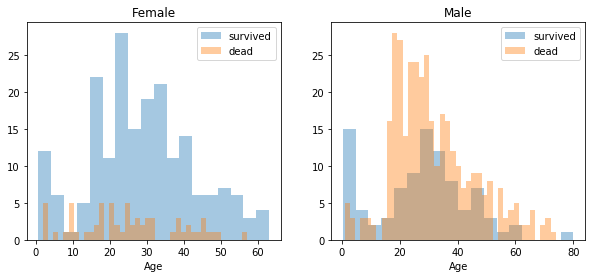

In [20]:
survived = 'survived'
dead = 'dead'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = dead, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = dead, ax = axes[1],kde = False)
ax.legend()
ax.set_title('Male')

#### -> 10살 이하의 어린이를 제외하고는 남성이 대부분 죽음을 당했음을 알 수 있다...ㅠㅠ

### (2) Pclass & Sex vs Survived

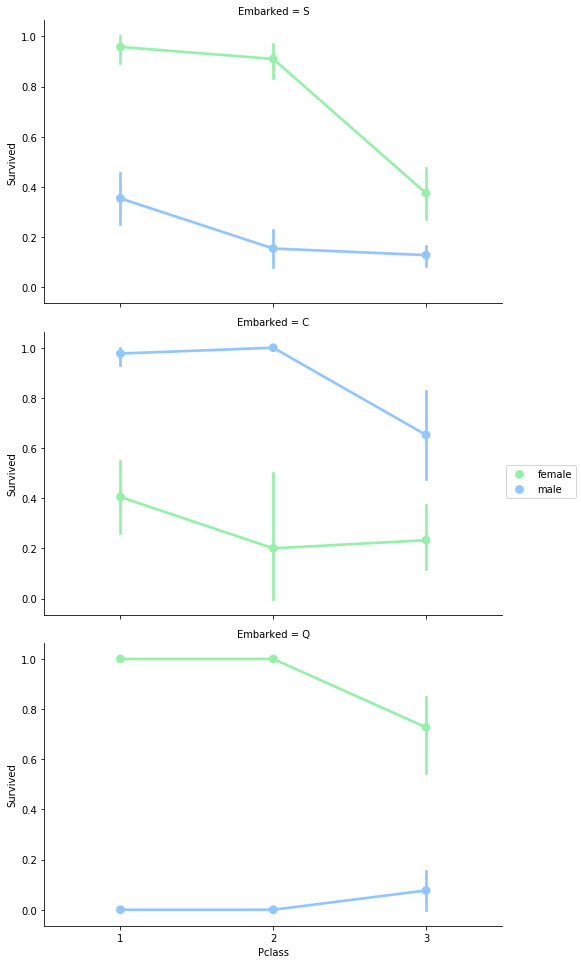

In [21]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='pastel',  order=None, hue_order=None )
FacetGrid.add_legend()
# Embarked(출발지) : C = Cherbourg(164명), Q = Queenstown(77명), S = Southampton(644명)

#### -> 위에서와 경향과 거의 비슷하지만, 출발지가 Cherbourg인 승객의 경우 남성이 생존율이 더 높음을 알 수 있다.
#### -> 또한 객실등급이 고급인 승객의 생존확률이 높았지만, 출발지가 Queenstown인 남성 승객의 경우 3등실에서의 생존율이 더 높았다.

### (3) Pclass(객실등급) vs Survived

#### Pclass는 생존여부(Survived)에 유의한 영향을 끼칠 것이라고 판단, 조금 더 자세히 살펴보기로 했다.

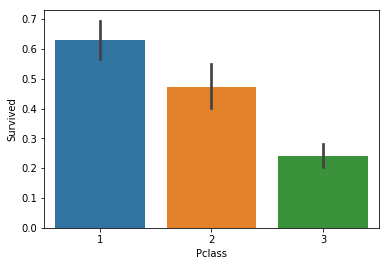

In [22]:
sns.barplot(x='Pclass', y='Survived', data = train)

#### Age도 같이 고려해보면

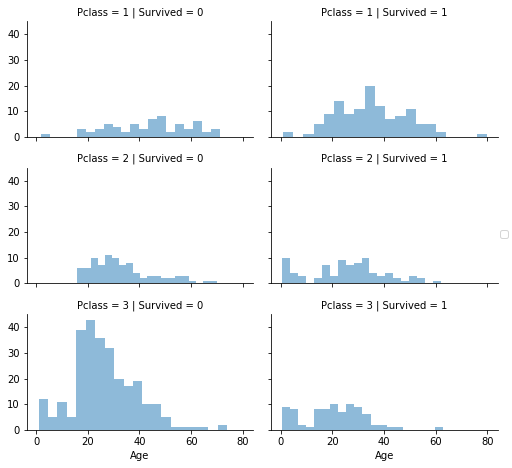

In [23]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

#### -> 예상했던 대로, 객실등급이 고급인 승객일수록(나이대와 크게 상관없이) 생존율이 높았음을 확인할 수 있다.

### (4) Family(동반 가족 수) vs Survived 

#### Family 변수에서, Family = 0인 승객(alone)과 Family > 0(Not alone)인 경우를 나누어 생각해보았다.

Text(0.5,1,'notalone')

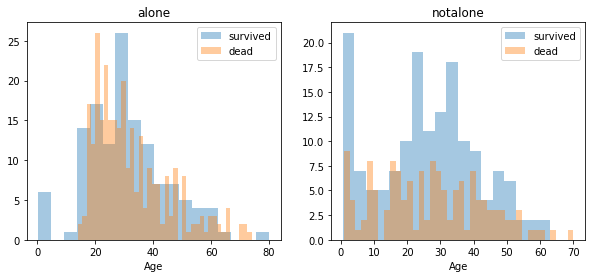

In [26]:
survived = 'survived'
dead = 'dead'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
alone = train[train['Companion']==0] ## 일행을 동반하지 않은 사람(alone)
notalone = train[train['Companion']>0] ## 일행을 1명이라도 동반한 사람(notalone)
ax = sns.distplot(alone[alone['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(alone[alone['Survived']==0].Age.dropna(), bins=40, label = dead, ax = axes[0], kde =False)
ax.legend()
ax.set_title('alone')
ax = sns.distplot(notalone[notalone['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(notalone[notalone['Survived']==0].Age.dropna(), bins=40, label = dead, ax = axes[1], kde = False)
ax.legend() 
ax.set_title('notalone')

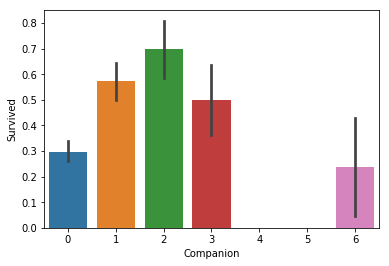

In [35]:
sns.barplot(x = 'Companion', y='Survived', data = train)

#### -> 전체적으로 가족을 동반하지 않은 경우, 젊은 연령대(20대 초중반)에서 사망 확률이 훨씬 높았음을 알 수 있다.

## 3. Missing Value Imputation and Converting Categoric Variable

In [30]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
Embarked       889
Family         891
dtype: int64

### (1) Embarked 변수

In [31]:
from collections import Counter
d = Counter(train['Embarked'])
d

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [215]:
# 결측치(nan)의 숫자가 2개 밖에 되지 않는 명목형 변수이므로, 최빈값인 'S'로 Imputation하기로 했다.
train.Embarked=train.Embarked.fillna('S')
train['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [216]:
# Embarked 변수 변환 :  C = 0, Q = 1, S = 2
LE_emb = LabelEncoder()                                    # 'string'자료형 categorical변수를 0/1/2 numeric으로 변환
train.Embarked = LE_emb.fit_transform(train['Embarked'])  # to make it easier for the classification algorithms to find patterns
LE_emb.classes_
train.head(10)

,Survived,Pclass,Sex,Age,Embarked,Companion
0,0,3,1,22.0,2,0
1,1,1,0,38.0,0,0
2,1,3,0,26.0,2,0
3,1,1,0,35.0,2,1
4,0,3,1,35.0,2,0
5,0,3,1,28.0,1,0
6,0,1,1,54.0,2,0
7,0,3,1,2.0,2,3
8,1,3,0,27.0,2,2
9,1,2,0,14.0,0,1


### (2) Age 변수

In [164]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [213]:
train.Age = train['Age'].fillna(28) ## Median으로 imputation

In [214]:
# Sex 변수 binary형으로 변환(female = 0, male = 1) 
LE_sex = LabelEncoder()                                    # female/male의 'string'자료형 categorical변수를 0/1 numeric으로 변환
train.Sex = LE_sex.fit_transform(train['Sex'])               # to make it easier for the classification algorithms to find patterns
LE_sex.classes_  
train.head(10)

,Survived,Pclass,Sex,Age,Embarked,Companion
0,0,3,1,22.0,S,0
1,1,1,0,38.0,C,0
2,1,3,0,26.0,S,0
3,1,1,0,35.0,S,1
4,0,3,1,35.0,S,0
5,0,3,1,28.0,Q,0
6,0,1,1,54.0,S,0
7,0,3,1,2.0,S,3
8,1,3,0,27.0,S,2
9,1,2,0,14.0,C,1


In [167]:
train.count()

Survived     891
Pclass       891
Sex          891
Age          891
Embarked     891
Companion    891
dtype: int64

## 3. Modeling

### (1) X, Y로 train data 분할

In [217]:
x_train = train.drop(['Survived'], axis=1).values  
y_train = train['Survived'].values

### (2) LR, DT, RF, NN, Boost의 Accuracy 비교

In [218]:
models = []
models.append(('LR', LogisticRegression())) # Logistic Regression Method
models.append(("KNN", KNeighborsClassifier(5)))       # K = 5인 K-means clustering(KNN)
models.append(("Decision Tree", DecisionTreeClassifier(max_depth=5)))      # DC의 maximal depth는 5에 해당함(Decision Tree Method)
models.append(("Random Forest", RandomForestClassifier(max_depth=5, n_estimators=500))) # Random Forest Method
models.append(("Neural Net", MLPClassifier(hidden_layer_sizes=25, activation='logistic', max_iter=1000))) # Neural Network Method
     # Hidden layer 25개, activation function으로는 hyperbolic tangent를 이용하며, backpropagation할 때 반복 수는 1000번에 해당함
models.append(("AdaBoost", AdaBoostClassifier(n_estimators = 10))) ## Boosting Method


results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state = 33333, shuffle = True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring = 'accuracy') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)

LR: 0.795718
KNN: 0.762035
Decision Tree: 0.811423
Random Forest: 0.817041
Neural Net: 0.625006
AdaBoost: 0.810325


## 4. Scoring

### (1)Test set 전처리(같은 방법)

In [219]:
test = pd.read_csv('score.csv') ## Test(Scoring) Data
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


#### Training data과 같은 방법으로 data를 처리한다.

In [52]:
## Test data의 missing value 분포 비율(NULL Ratio) 계산 
total = test.isnull().sum().sort_values(ascending=False) ## 결측치 수가 많은 순서대로 정렬(내림차순)
percent_1 = test.isnull().sum()/test.isnull().count()*100 ## NA ratio
percent_2 = (round(percent_1, 1)).sort_values(ascending=False) ## NA ratio 소수 둘째 자리에서 반올림
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%']) ## Missing value table
missing_data.head(5)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
Embarked,0,0.0
Ticket,0,0.0


In [221]:

for i in range(len(test)):
    companion[i]=test['Ticket'][test['Ticket']==test['Ticket'][i]].count()
    

In [220]:
companion=pd.Series([])

In [222]:
test['Companion']=companion-1

In [53]:
## SibSp + Parch = Family 변수 생성
test['Family'] = test['SibSp']+(test['Parch']) 
test['Family'] = test['Family'].astype(int)

In [209]:
## SibSp + Parch = Family 변수 생성
'Family' = test['SibSp']+(test['Parch']) 
'Family' = test['Family'].astype(int)

SyntaxError: can't assign to literal (<ipython-input-209-7b56b60f69b4>, line 2)

In [223]:
# Drop Variables
test = test.drop(['PassengerId','SibSp','Parch','Fare','Cabin','Name','Ticket'], axis = 1)
test.head(10)

,Survived,Pclass,Sex,Age,Embarked,Companion
0,0,3,male,34.5,Q,0
1,1,3,female,47.0,S,0
2,0,2,male,62.0,Q,0
3,0,3,male,27.0,S,0
4,1,3,female,22.0,S,0
5,0,3,male,14.0,S,0
6,1,3,female,30.0,Q,0
7,0,2,male,26.0,S,0
8,1,3,female,18.0,C,0
9,0,3,male,21.0,S,0


In [55]:
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [224]:
# Imputation For Age(by 'Median = 27')
test.Age = test['Age'].fillna(27)

In [57]:
test.count()

PassengerId    418
Survived       418
Pclass         418
Sex            418
Age            418
Embarked       418
Family         418
dtype: int64

In [225]:
# Sex 변수 binary형으로 변환(female = 0, male = 1) 
LE_sex = LabelEncoder()                                    # female/male의 'string'자료형 categorical변수를 0/1 numeric으로 변환
test.Sex = LE_sex.fit_transform(test['Sex'])               # to make it easier for the classification algorithms to find patterns
LE_sex.classes_  
test.head(10)

,Survived,Pclass,Sex,Age,Embarked,Companion
0,0,3,1,34.5,Q,0
1,1,3,0,47.0,S,0
2,0,2,1,62.0,Q,0
3,0,3,1,27.0,S,0
4,1,3,0,22.0,S,0
5,0,3,1,14.0,S,0
6,1,3,0,30.0,Q,0
7,0,2,1,26.0,S,0
8,1,3,0,18.0,C,0
9,0,3,1,21.0,S,0


In [226]:
# Embarked 변수 discrete 하게 변환( C = 0, Q = 1, S = 2)
LE_emb = LabelEncoder()
test.Embarked = LE_emb.fit_transform(test['Embarked'])
LE_emb.classes_
test.head(10)

,Survived,Pclass,Sex,Age,Embarked,Companion
0,0,3,1,34.5,1,0
1,1,3,0,47.0,2,0
2,0,2,1,62.0,1,0
3,0,3,1,27.0,2,0
4,1,3,0,22.0,2,0
5,0,3,1,14.0,2,0
6,1,3,0,30.0,1,0
7,0,2,1,26.0,2,0
8,1,3,0,18.0,0,0
9,0,3,1,21.0,2,0


### (2) Data Partitioning and Scoring

In [227]:
x_test = test.drop(['Survived'], axis = 1).values
y_test = test['Survived'].values

In [228]:
# Accuracy가 가장 높은 Random Forest 방법으로 test dataset에 대한 Prediction 수행

RF = RandomForestClassifier(max_depth = 5, n_estimators = 500)
RF.fit(x_train, y_train)
predictions = RF.predict(x_test)
print(round(accuracy_score(y_test, predictions),2))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions)) # 행 : 실제 Survived 여부 / 열 : 예측 Survived 여부

0.94
[[254  12]
 [ 12 140]]
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       266
          1       0.92      0.92      0.92       152

avg / total       0.94      0.94      0.94       418



# 방학 동안 고생 많으셨습니다!!! ^^